<a href="https://colab.research.google.com/github/RubenMcCarty/Deep-Learning/blob/main/Lab_07_RNN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Networks**
## Creado por [M.Sc. Ruben Quispe](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
### Curso [Deep Learning](https://eie.pe/curso-machine-learning/)

# **Procesamiento de datos**

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Utilizaremos las 10,000 palabras más usuales.
max_features = 10000

# Por cada crítica, consideraremos sólo las 500 primeras palabras dentro de las 10,000 más usuales.
maxlen = 500
batch_size = 32

# Cargamos los datos como listas de enteros.
print ('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print (len(input_train), 'train sequences')
print (len(input_test), 'test sequences')

# Convertimos nuestras listas de enteros en tensores 2D de dimensiones (número de críticas, maxlen)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


# **Definiendo la red neuronal**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding, SimpleRNN # RNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))

# Agregamos el clasificador
model.add(Dense(1, activation='sigmoid'))
#Compilación
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#Resumen de la arquitectura
model.summary()

#Entrenamiento
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 24s 147ms/step - loss: 0.6375 - acc: 0.6334 - val_loss: 0.3867 - val_acc: 0.8446
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3595 - acc: 0.8557 - val_loss: 0.4365 - val_acc: 0.7892
Epoch 3/10
157/157 [==============================] - 22s 141ms/step - loss: 0.2754 - acc: 0.8964 - val_loss: 

Best accuracy epoch:  3, Value :  0.8731999993
Best loss epoch  3


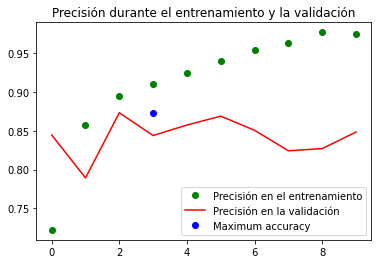

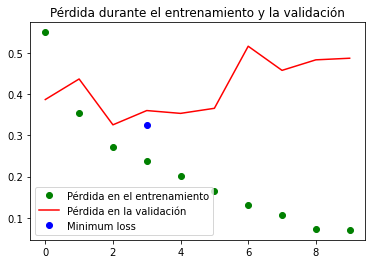

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

#Precisión
plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch: % d, Value : % .10f' %(max_val_acc_epoch, max_val_acc))
plt.figure()

#Pérdida
plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

# **Implementación de LSTM**

In [8]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))

# Agregamos el clasificador
model.add(Dense(1, activation='sigmoid'))
#Compilación
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#Resumen de la arquitectura
model.summary()

#Entrenamiento
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 52s 322ms/step - loss: 0.6338 - acc: 0.6483 - val_loss: 0.3713 - val_acc: 0.8516
Epoch 2/10
157/157 [==============================] - 55s 350ms/step - loss: 0.3381 - acc: 0.8644 - val_loss: 0.3426 - val_acc: 0.8560
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 0.2527 - acc: 0.9039 - val_loss